In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [10]:
url = "https://raw.githubusercontent.com/PratheepaJ/datasets/refs/heads/master/ass6-dataset.csv"
df = pd.read_csv(url)

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


### Question 1    
According to the dataset description, it includes 303 observations with 13 features, including age, sex, chest pain type, resting blood pressure, cholesterol levels, fasting blood sugar, electrocardiographic results, and others. The target value is num, we should transform it to a binary with value 0-4 to label:

`1`: presence of heart disease(1-4)

`0`: no heart disease(0) 

Following that, we can figure out the binary classification prediction, if the patient has heart disease or not.

### Question 2

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [13]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        299 non-null    category
 12  thal      301 non-null    category
 13  num       303 non-null    int64   
dtypes: category(8), float64(1), int64(5)
memory usage: 17.8 KB


In [15]:
continuous_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
scaler = StandardScaler()
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    float64 
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    float64 
 4   chol      303 non-null    float64 
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    float64 
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        299 non-null    category
 12  thal      301 non-null    category
 13  num       303 non-null    int64   
dtypes: category(8), float64(5), int64(1)
memory usage: 17.8 KB


### Question 3¶

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.948726,1,1,0.757525,-0.264900,1,2,0.017197,0,1.087338,3,0.0,6.0,0
1,1.392002,1,4,1.611220,0.760415,0,2,-1.821905,1,0.397182,2,3.0,3.0,2
2,1.392002,1,4,-0.665300,-0.342283,0,2,-0.902354,1,1.346147,2,2.0,7.0,1
3,-1.932564,1,3,-0.096170,0.063974,0,0,1.637359,0,2.122573,3,0.0,3.0,0
4,-1.489288,0,2,-0.096170,-0.825922,0,2,0.980537,0,0.310912,1,0.0,3.0,0


In [18]:
df.shape

(303, 14)

In [19]:
df_stats = df.describe()
print(df_stats)

                age      trestbps          chol       thalach       oldpeak  \
count  3.030000e+02  3.030000e+02  3.030000e+02  3.030000e+02  3.030000e+02   
mean  -1.465641e-18  4.426236e-16  2.345026e-16 -1.172513e-16  2.345026e-17   
std    1.001654e+00  1.001654e+00  1.001654e+00  1.001654e+00  1.001654e+00   
min   -2.819115e+00 -2.145037e+00 -2.334877e+00 -3.442067e+00 -8.968617e-01   
25%   -7.135564e-01 -6.652997e-01 -6.905030e-01 -7.053073e-01 -8.968617e-01   
50%    1.729945e-01 -9.616980e-02 -1.101357e-01  1.485618e-01 -2.067053e-01   
75%    7.270888e-01  4.729601e-01  5.476139e-01  7.178079e-01  4.834512e-01   
max    2.500191e+00  3.887739e+00  6.138485e+00  2.294182e+00  4.451851e+00   

              num  
count  303.000000  
mean     0.937294  
std      1.228536  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      2.000000  
max      4.000000  


In [20]:
missing_values = df.isnull().sum()
missing_values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

The dataset is from the UCI Heart Disease Database and it includes 303 observations with 13 features and 1 target variable (num), which shows whether the patient has heart disease. 

There are missing values in variables `ca` (4 missing) and `thal` (2 missing).

The target variable `num` is in range 0-4, need to transform to binary. 

| Variable Name | Data Type             | Description                                                      |
|---------------|-----------------------|------------------------------------------------------------------|
| age           | Continuous (Integer -> sacled)  | Age (years)                                                      |
| sex           | Categorical           | Gender (1 = male; 0 = female)                                             |
| cp            | Categorical           | Chest pain type  (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain 4 = asymptomatic)                                                |
| trestbps      | Continuous (Integer -> sacled)  | resting blood pressure (in mm Hg on admission to the hospital)                                   |
| chol          | Continuous (Integer -> sacled)  | serum cholestoral in mg/dl                                       |
| fbs           | Categorical           | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)                        |
| restecg       | Categorical           | 0 = normal; 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria                             |
| thalach       | Continuous (Integer -> sacled)  | Maximum heart rate achieved                                      |
| exang         | Categorical           | Exercise-induced angina (1 = yes; 0 = no)                                 |
| oldpeak       | Continuous            | ST depression induced by exercise relative to rest                |
| slope         | Categorical           | Slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)                           |
| ca            | Integer (with missing values)  -> sacled | Number of major vessels (0-3) colored by fluoroscopy     |
| thal          | Categorical (with missing values) | Thalassemia type (3 = normal; 6 = fixed defect; 7 = reversable defect)                                       |
| num           | Integer               | Diagnosis of heart disease (0: no disease, 1-4: varying severity)|


### Question 4

In [21]:
df['num'] = df['num'].apply(lambda x: 1 if x >0 else 0)
print(df['num'].value_counts())
df.head()

num
0    164
1    139
Name: count, dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.948726,1,1,0.757525,-0.264900,1,2,0.017197,0,1.087338,3,0.0,6.0,0
1,1.392002,1,4,1.611220,0.760415,0,2,-1.821905,1,0.397182,2,3.0,3.0,1
2,1.392002,1,4,-0.665300,-0.342283,0,2,-0.902354,1,1.346147,2,2.0,7.0,1
3,-1.932564,1,3,-0.096170,0.063974,0,0,1.637359,0,2.122573,3,0.0,3.0,0
4,-1.489288,0,2,-0.096170,-0.825922,0,2,0.980537,0,0.310912,1,0.0,3.0,0


### Question 5

<Axes: >

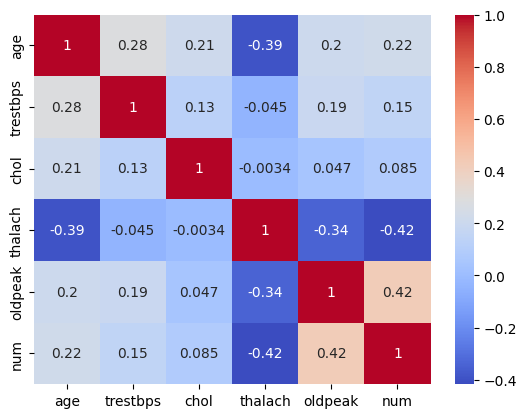

In [22]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

The variable `thalach` has the most relative with the target (r = -0.42), which means higher maximum heart rates lead to a lower probability of heart disease. We need to use `thalach` for the prediction.

The variable `oldpeak` also plays a significant role with target (r = 0.42), which means greater ST depression may lead to heart disease. Thus, we also need `oldpeak` for the prediction.


In addition, we can use both `thalach` and `oldpeak` due to the corelation rate between these two factors is not too strong (-0.34).

### Question 6

In [23]:
df.shape

(303, 14)

In [24]:
data_clean = df.dropna()

In [25]:
data_clean.shape

(297, 14)

After dropping NA, we still have 297 observations.

### Question 7

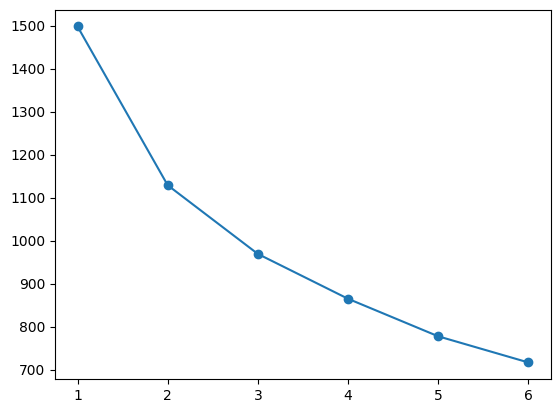

In [26]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

X = data_clean[continuous_cols]
silhouette_avgs = []
K_range = [1, 2, 3, 4, 5, 6]

for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_avgs.append(kmeans.inertia_)
fig, ax = plt.subplots()
ax.plot(K_range, silhouette_avgs, marker='o')

plt.show()

In [27]:
best_k = 2
kmeans_best = KMeans(n_clusters=best_k, n_init=20, random_state=42).fit(X)
labels_best = kmeans_best.labels_

cluster_counts = pd.Series(labels_best).value_counts()
print("Count of each Cluster:\n", cluster_counts)

Count of each Cluster:
 0    166
1    131
Name: count, dtype: int64


In [28]:
pca = PCA()
pca.fit(X)

num_pcs = pca.components_.shape[0]
num_pcs

5

In [29]:
pca_loadings = pd.DataFrame(
    pca.components_.T,
    index=X.columns,  
    columns=[f'PC{i+1}' for i in range(num_pcs)]
)
pca_loadings.head()

,PC1,PC2,PC3,PC4,PC5
age,0.563905,0.117086,-0.186296,-0.522448,0.600536
trestbps,0.394078,0.427860,0.727905,-0.128570,-0.339503
chol,0.231550,0.685612,-0.535323,0.402216,-0.167250
thalach,-0.505247,0.472911,0.317293,0.167503,0.626377
oldpeak,0.466716,-0.330934,0.219550,0.721584,0.322139


In [30]:
pc_scores = pd.DataFrame(
    pca.fit_transform(X), 
    columns=[f'PC{i+1}' for i in range(num_pcs)]
)
pc_scores.head(5)

,PC1,PC2,PC3,PC4,PC5
0,1.254893,-0.103555,0.766516,0.078899,0.709033
1,2.685787,0.375242,0.021411,-0.656111,-0.860377
2,1.511628,-1.233993,-0.545267,0.031843,0.978618
3,-0.965573,-0.157097,1.247179,2.844652,0.561862
4,-1.435337,-0.426397,1.034824,0.837848,-0.018124


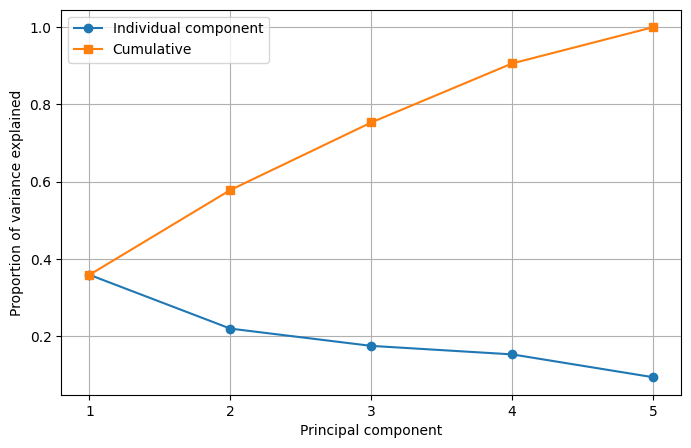

In [31]:
pc_indices = np.arange(1, num_pcs + 1)

plt.figure(figsize=(8,5))
plt.plot(pc_indices, pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot(pc_indices, np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.xlabel('Principal component')
plt.ylabel('Proportion of variance explained')
plt.xticks(pc_indices)
plt.legend(loc=2)
plt.grid(True)
plt.show()

In [32]:
pc2_loadings = pca_loadings['PC2']
most_influential_var_pc2 = pc2_loadings.abs().idxmax()
print("The most influential variable in PC2 is:", most_influential_var_pc2)

The most influential variable in PC2 is: chol


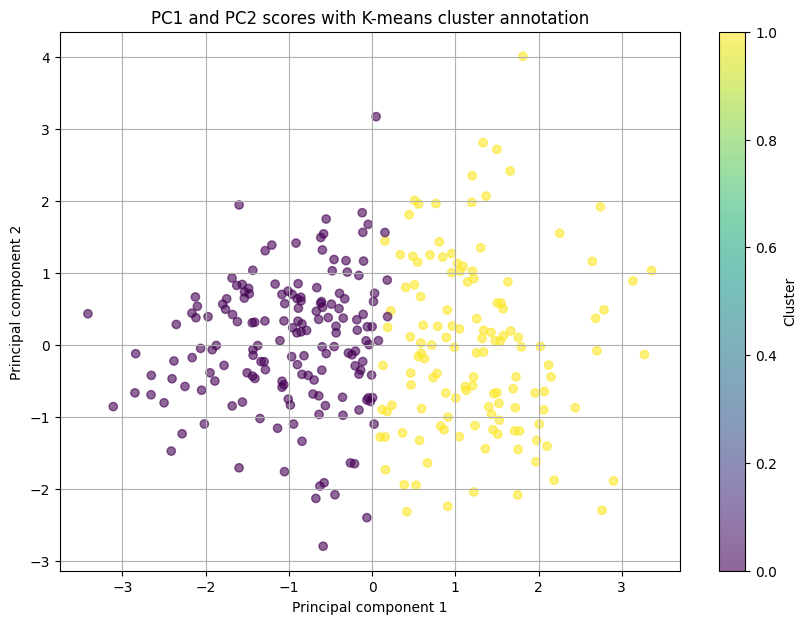

In [33]:
pcs_selected = pc_scores[['PC1', 'PC2']].copy()
pcs_selected['Cluster'] = labels_best

plt.figure(figsize=(10, 7))

scatter = plt.scatter(
    pcs_selected['PC1'], 
    pcs_selected['PC2'], 
    c=pcs_selected['Cluster'], 
    cmap='viridis', 
    alpha=0.6
)

plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('PC1 and PC2 scores with K-means cluster annotation')

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

plt.grid(True)
plt.show()

### Question 8

In [34]:
X = data_clean.drop(['num'], axis=1)
y = data_clean['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [35]:
print(len(X_train), len(X_test))

207 90


### Question 9

Logistic Regression`: It's the most popular model used in binary classification problems. 

`KNN`: It's a simple and effective model, which can classify binary based on the labels of nearest data points.

### Question 10

We selected `Accuracy` and `ROC-AUC`  metrics to compare classifier performance.

Accuracy shows the proportion of total correct predictions according to all predictions made by the classifier. It is calculated using the formula:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

- **TP** = True Positives  
- **TN** = True Negatives  
- **FP** = False Positives  
- **FN** = False Negatives  

ROC-AUC is the most useful matric when we work on health related field, it shows the `True Positive Rate (Sensitivity)` against the `False Positive Rate (1 - Specificity)`. The AUC shows the model quality:


- **AUC = 1.0**: Perfect model  
- **AUC = 0.5**: Random model
- **AUC < 0.5**: Worse model

### Question 11

In [52]:
log1 = LogisticRegression(max_iter=1000, random_state=120)

In [53]:
log1.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=120)

In [54]:
pred_prob1 = log1.predict_proba(X_test)
pred_prob1[0:2]

array([[0.84383657, 0.15616343],
       [0.08932763, 0.91067237]])

In [58]:
df = pd.DataFrame(
    data = {'prob1': pred_prob1[:,1], 'y_test': y_test}
    )
df.head(5)

,prob1,y_test
139,0.156163,0
236,0.910672,1
51,0.380896,0
295,0.020444,0
245,0.586430,1


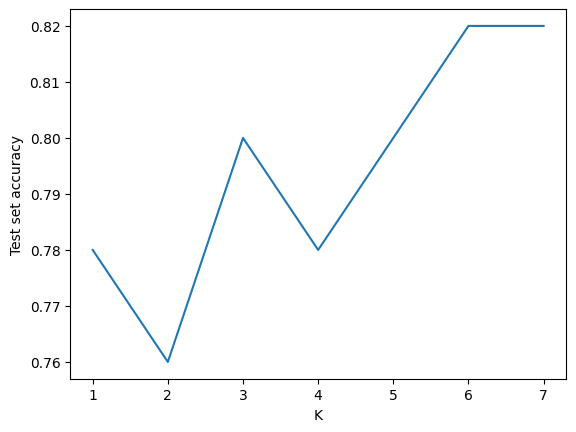

In [56]:
from sklearn import neighbors

k_range = range(1, 8)
scores = [] 

for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(round(metrics.accuracy_score(y_test, y_pred),2))
    
plt.plot(k_range, scores)
plt.xlabel('K')
plt.ylabel('Test set accuracy')
plt.xticks(range(1,8))
plt.show()

In [59]:
knn7 = neighbors.KNeighborsClassifier(n_neighbors=7)
knn7.fit(X_train, y_train)
y_pred7 = knn7.predict(X_test)

### Question 12

In [60]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(log1, prefit=True)

In [61]:
X_train_sel = selector.transform(X_train)
X_test_sel = selector.transform(X_test)

/Users/jiangdonghao/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/jiangdonghao/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


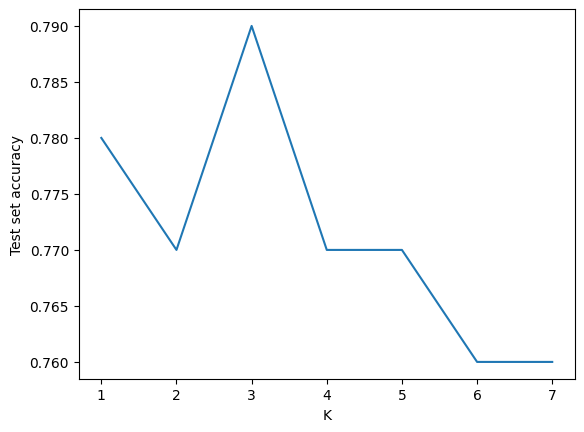

In [62]:
from sklearn import neighbors

k_range = range(1, 8)
scores = [] 

for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sel, y_train)
    y_pred = knn.predict(X_test_sel)
    scores.append(round(metrics.accuracy_score(y_test, y_pred),2))
    
plt.plot(k_range, scores)
plt.xlabel('K')
plt.ylabel('Test set accuracy')
plt.xticks(range(1,8))
plt.show()

In [63]:
knn3 = neighbors.KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_sel, y_train)
y_pred3 = knn3.predict(X_test_sel)


### Question 13

In [69]:
df['y_pred'] = df.prob1.apply(lambda x: 1 if x > 0.5 else 0)
cm1 = confusion_matrix(df.y_test, df.y_pred)

total1 = sum(sum(cm1))

acc_lr = (cm1[0,0]+cm1[1,1])/total1
print ('LG Accuracy: ', round(acc_lr, 4))

LG Accuracy:  0.8111


In [72]:
auc_lr = roc_auc_score(df.y_test, df.prob1)
print('LG AUC: ', round(auc_lr, 4))

LG AUC:  0.8914


In [73]:
acc_knn7 = accuracy_score(y_test, y_pred7)
print ('KNN (all features) Accuracy: ', round(acc_knn7, 4))

KNN (all features) Accuracy:  0.8222


In [74]:
auc_knn7 = roc_auc_score(y_test, knn7.predict_proba(X_test)[:, 1])
print ('KNN (all features) Accuracy: ', round(auc_knn7, 4))

KNN (all features) Accuracy:  0.8824


In [75]:
acc_knn3 = accuracy_score(y_test, y_pred3)
print ('KNN (selected features) Accuracy: ', round(acc_knn3, 4))

KNN (selected features) Accuracy:  0.7889


In [76]:
auc_knn3 = roc_auc_score(y_test, knn3.predict_proba(X_test_sel)[:, 1])
print ('KNN (selected features) Accuracy: ', round(auc_knn3, 4))

KNN (selected features) Accuracy:  0.7652


Model    K value   Accuracy     ROC-AUC
Logistic Regression none 0.8111   0.8914
KNN (all features) K = 7  0.8222   0.8824 
KNN (selected features) K = 3  0.7889 0.7652

`KNN with all features (K = 7)` has the highest accuracy, however `Logistic Regression` has the highest ROC-AUC. By contract, `KNN with selected features (K = 3)` performed worst, especially in terms of AUC, it only has 0.7652. This may due to we removed some important features for KNN.

Thus, KNN model has a better accuracy, `Logistic Regression` is the best model due to it is good on both performance and interpretability.

### Question 14